#Autoregression AR (Box-Jenquis)

## 1 Libraries

In [ ]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

## 2 Database

In [ ]:
db=pd.read_csv("Netflix_stock_history.csv")
db

,Date,Close
0,5/23/2002,1.196429
1,5/24/2002,1.210000
2,5/28/2002,1.157143
3,5/29/2002,1.103571
4,5/30/2002,1.071429
...,...,...
4865,9/20/2021,575.429993
4866,9/21/2021,573.140015
4867,9/22/2021,590.650024
4868,9/23/2021,593.260010


<Axes: >

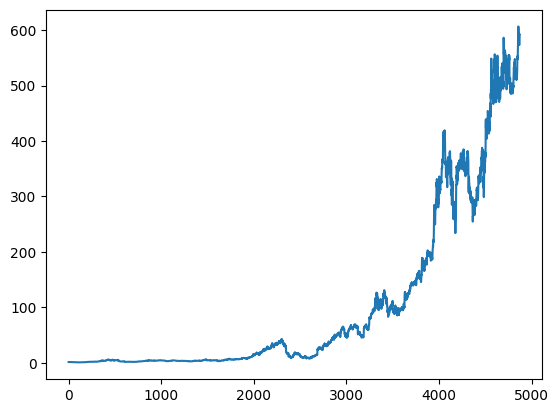

In [ ]:
db["Close"].plot()

## 3 Stationarity (the stability of the variable -mean and variance-)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_stationarity=adfuller(db["Close"],autolag="AIC")
print("P-Value: ", test_stationarity[1])

P-Value:  0.9990812682590767


tsa - times series analysis

adfuller - **augmented Dickay and Fuller** its a test toknow if a variable or model is stationary

if the result is less than 0.005 it means that the data can be described or predycted by a regression model because is more stable

Pronosticating the change on close price (beneficios, goods earned (?))

##3.1 First diff

shift(1) valor anterior

In [ ]:
db["Close_returns"]=db["Close"]-db["Close"].shift(1)

In [ ]:
db

,Date,Close,Close_returns
0,5/23/2002,1.196429,NaN
1,5/24/2002,1.210000,0.013571
2,5/28/2002,1.157143,-0.052857
3,5/29/2002,1.103571,-0.053572
4,5/30/2002,1.071429,-0.032142
...,...,...,...
4865,9/20/2021,575.429993,-13.919983
4866,9/21/2021,573.140015,-2.289978
4867,9/22/2021,590.650024,17.510010
4868,9/23/2021,593.260010,2.609985


In [ ]:
test_stationarity_2=adfuller(db["Close_returns"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity_2[1])

P-Value:  2.5123294254031683e-23


## 4 Partial autocorrelation funtion PAC

Now we are going to check and generate a analisys.

Toda serie tiene memoria, el proceso tiene un orden y la influencia que tiene el tiempo. Ahora se va aentender la dependencia del orden para poder crear un pronóstico

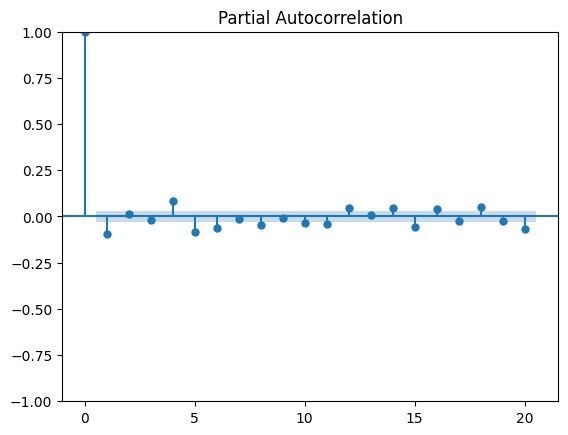

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db["Close_returns"].dropna(), lags=20)

## 4.1 Autocorrelation function AC

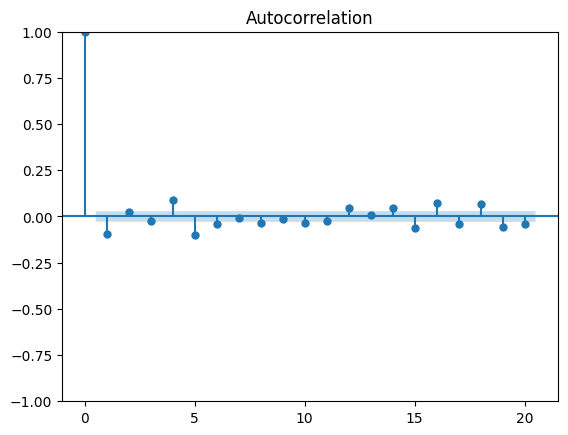

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(db["Close_returns"].dropna(), lags=20)

ACF for MA Moving Average

## 5 Autoregressive model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA (p,d,q)

p = Número de resagos del AR

d = Número de diferencias en la serie

q = Número de resagos en el MA, meoving average

In [ ]:
modelARIMA=ARIMA(db["Close_returns"].dropna(),order=(2,1,2)).fit()
print(modelARIMA.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Close_returns   No. Observations:                 4869
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14333.288
Date:                Thu, 31 Aug 2023   AIC                          28676.576
Time:                        23:33:46   BIC                          28709.028
Sample:                             0   HQIC                         28687.965
                               - 4869                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9311      0.029    -32.611      0.000      -0.987      -0.875
ar.L2         -0.0446      0.009     -5.131      0.000      -0.062      -0.028
ma.L1         -0.1568      0.027     -5.718      0.0

## 6 Predictions

In [ ]:
pred_2=modelARIMA.predict(dynamic=False)
pred_2

1       0.000000
2       0.013571
3      -0.015378
4      -0.031930
5      -0.030845
          ...   
4865   -0.062854
4866    1.701564
4867   -0.083262
4868   -0.844741
4869    0.252862
Name: predicted_mean, Length: 4869, dtype: float64

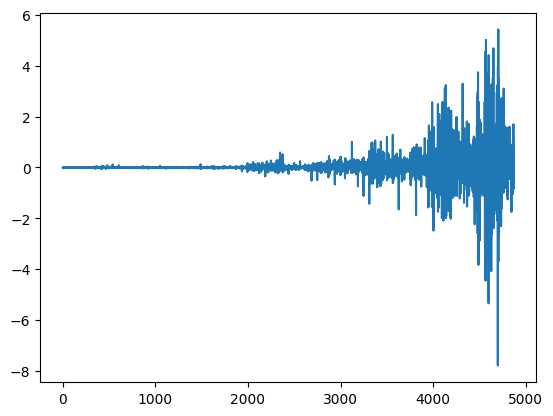

In [ ]:
plt.plot(pred_2)

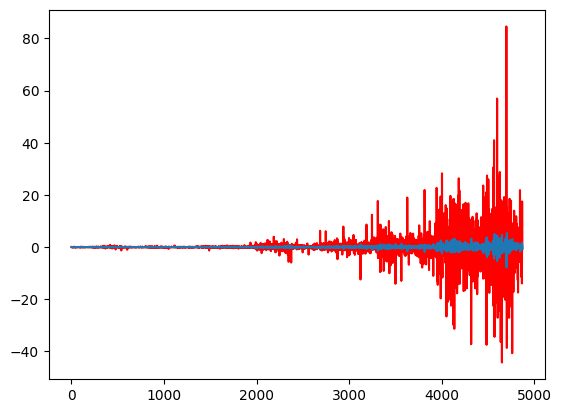

In [ ]:
from matplotlib import pyplot
pyplot.plot(db["Close_returns"].dropna(),color="red")
pyplot.plot(pred_2)

#Moving Average

In [ ]:
db["Close_returns"].dropna()

1        0.013571
2       -0.052857
3       -0.053572
4       -0.032142
5        0.005000
          ...    
4865   -13.919983
4866    -2.289978
4867    17.510010
4868     2.609985
4869    -0.869995
Name: Close_returns, Length: 4869, dtype: float64